# About the project

1. This is multiple page webscraping project from the flipkart mobile stores
2. We using the flipkart link to extract mobiles details
3. In the project I use the requests and BeautifulSoup libraries for scrape the data
4. Once we scrape the required information we store the data into .csv format

In [1]:
# import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#from urllib.request import urlopen

In [4]:
# to check whether website working or not if status code is 200 the code work else not
page_link="https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3DGoogle"
respond=requests.get(page_link)
respond.status_code

200

In [5]:
'''In this process firstly html code gets extracted then we find
    all information about mobiles such as mobile brand,price,rating,ram and rom.'''
def scrape_the_data(url):
    respond=requests.get(url)
    if respond.status_code!=200:
        raise Exception('page laod to fail {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc

# in this mobile brand gets extracted and stored in a list
doc_scrape=scrape_the_data(page_link)
doc_scrape
def scrape_the_mobile_brand(doc_scrape):
    class_='_4rR01T'
    scrap_mobile=doc_scrape.find_all('div',{'class':class_})
    mobile_brand=[]
    for mobile in scrap_mobile:
        mobile_brand.append(mobile.text)
    return mobile_brand

# in this ram_and _row gets extracted and stored in a list
def scrape_model_ram(doc_scrape):
    ram_and_row=[]
    mobile_ram_and_row=doc_scrape.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in mobile_ram_and_row:
        ram_and_row.append(ram_row.text)
    return ram_and_row

#in this mobile_rating gets extracted and stored in alist
def scrape_rating_mobile(doc_scrape):
    mobile_rating=[]
    rating=doc_scrape.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
    return mobile_rating

# in this mobile price gets extracted and stored in a list
def scrape_mobile_price(doc_scrape):
    mobile_price=doc_scrape.find_all('div',{'class':'_30jeq3 _1_WHN1'})
    price=[]
    for price_of_mobile in mobile_price:
        price.append(price_of_mobile.text)
    return price
    
    
    

In [6]:
print(len(scrape_the_mobile_brand(doc_scrape)))
print(len(scrape_model_ram(doc_scrape)))
print(len(scrape_rating_mobile(doc_scrape)))
print(len(scrape_mobile_price(doc_scrape)))

14
14
14
14


In [7]:
# function for call above function and create a dataframe and return it
def scrape_the_entire_data(url):
    respond=requests.get(url)
    if respond.status_code!=200:
        raise Exception('failed to load the page {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    all_information_about_phone={
        'Mobile_Model':scrape_the_mobile_brand(doc_scrape),
        'Prices':scrape_mobile_price(doc_scrape),
        'Rating':scrape_rating_mobile(doc_scrape),
        'RAM_ROM':scrape_model_ram(doc_scrape)
    }
    return pd.DataFrame(all_information_about_phone)
data=scrape_the_entire_data(page_link)
data

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹28,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹28,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7a (Sea, 128 GB)","₹43,999",4,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
3,"Google Pixel 7a (Charcoal, 128 GB)","₹43,999",4,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
4,"Google Pixel 7a (Snow, 128 GB)","₹43,999",4,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
5,"Google Pixel 7 (Snow, 128 GB)","₹53,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
6,"Google Pixel 7 (Obsidian, 128 GB)","₹53,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
7,"Google Pixel 7 (Lemongrass, 128 GB)","₹53,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
8,"Google Pixel 7 Pro (Obsidian, 128 GB)","₹75,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...
9,"Google Pixel 7 Pro (Hazel, 128 GB)","₹75,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...


In [8]:
# save model to .csv format
data.to_csv('Google Pixel.csv',index=False)

In [9]:
def realme_mobile_scrape():
    page_url='https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3Drealme'
    respond=requests.get(page_url)
    if respond.status_code!=200:
        raise Exception('failed to load the page {}'.format(page_url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
html_code=realme_mobile_scrape()

In [10]:
'''In this code we extract all pages of realme mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 12
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3Drealme&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_realme = web_page.find_all('div', {'class': '_4rR01T'})
    realme_price = web_page.find_all('div', {'class': '_30jeq3'})
    realme_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    realme_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_realme) == len(realme_price) == len(realme_rating) == len(realme_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_realme, realme_price, realme_rating, realme_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_realme_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

realme = pd.DataFrame(all_realme_mobile_information)
realme


Skipping page 12 due to inconsistent data lengths.


,Mobile_Model,Prices,Rating,RAM_ROM
0,"realme C55 (Sunshower, 128 GB)","₹13,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
1,"realme C55 (Rainforest, 128 GB)","₹13,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
2,"realme C55 (Rainy Night, 128 GB)","₹13,999",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
3,"realme C55 (Rainforest, 64 GB)","₹11,999",4.3,6 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....
4,"realme C55 (Sunshower, 64 GB)","₹11,999",4.3,6 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....
...,...,...,...,...
259,Realme C30 - Locked with Airtel Prepaid (Lake ...,"₹6,049",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 1 TB16....
260,"realme C15 (Power Silver, 32 GB)","₹11,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
261,"realme 11 Pro+ 5G (Oasis Green, 256 GB)","₹29,999",4.3,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...
262,"realme Narzo 50i Prime (Dark Blue, 32 GB)","₹7,999",4.2,3 GB RAM | 32 GB ROM16.51 cm (6.5 inch) Displa...


In [11]:
# saving realme data to .csv format
realme.to_csv('Realme.csv',index=False)

In [12]:
'''In this code we extract all pages of oppo mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 12
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3DOPPO&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_oppo = web_page.find_all('div', {'class': '_4rR01T'})
    oppo_price = web_page.find_all('div', {'class': '_30jeq3'})
    oppo_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    oppo_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_oppo) == len(oppo_price) == len(oppo_rating) == len(oppo_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_oppo, oppo_price, oppo_rating, oppo_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_oppo_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

oppo = pd.DataFrame(all_oppo_mobile_information)
oppo


Skipping page 3 due to inconsistent data lengths.
Skipping page 5 due to inconsistent data lengths.


,Mobile_Model,Prices,Rating,RAM_ROM
0,"OPPO F21 Pro (Sunset Orange, 128 GB)","₹20,999",4.4,8 GB RAM | 128 GB ROM16.33 cm (6.43 inch) Disp...
1,"OPPO A17 (Lake Blue, 64 GB)","₹12,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
2,"OPPO A17 (Midnight Black, 64 GB)","₹12,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
3,"OPPO A17 (Sunlight Orange, 64 GB)","₹12,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
4,"OPPO A17k (Blue, 64 GB)","₹9,499",4.5,3 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
...,...,...,...,...
213,"OPPO A52 (Stream White, 128 GB)","₹17,990",4.4,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
214,"OPPO F15 (Blazing Blue, 128 GB)","₹22,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
215,"OPPO F15 (Blazing Blue, 128 GB)","₹20,990",4.4,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
216,"OPPO A53 (Moonlight Black, 128 GB)","₹16,990",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...


In [13]:
# save oppo data to .csv format
oppo.to_csv('Oppo.csv',index=False)

In [14]:
'''In this code we extract all pages of vivo mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 5
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3Dvivo&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_vivo = web_page.find_all('div', {'class': '_4rR01T'})
    vivo_price = web_page.find_all('div', {'class': '_30jeq3'})
    vivo_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    vivo_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_vivo) == len(vivo_price) == len(vivo_rating) == len(vivo_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_vivo, vivo_price, vivo_rating, vivo_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_vivo_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

vivo = pd.DataFrame(all_vivo_mobile_information)
vivo


,Mobile_Model,Prices,Rating,RAM_ROM
0,"vivo T2x 5G (Aurora Gold, 128 GB)","₹15,999",4.4,8 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...
1,"vivo T2x 5G (Glimmer Black, 128 GB)","₹13,999",4.4,6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...
2,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",4.5,4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...
3,"vivo T2x 5G (Glimmer Black, 128 GB)","₹15,999",4.4,8 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...
4,"vivo T2x 5G (Marine Blue, 128 GB)","₹13,999",4.4,6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...
...,...,...,...,...
115,"vivo T1 5G (Silky White, 128 GB)","₹16,990",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
116,"vivo V21 5G (Arctic White, 128 GB)","₹29,990",4.3,8 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...
117,"vivo Y20i (Dawn White, 64 GB)","₹11,490",4.4,3 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
118,"vivo T1X (DIAMOND GLOW, 128 GB)","₹14,999",4.5,4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...


In [15]:
# save vivo data to .csv format
vivo.to_csv('Vivo.csv',index=False)

In [16]:
'''In this code we extract all pages of poco mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 6
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3DPOCO&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_poco = web_page.find_all('div', {'class': '_4rR01T'})
    poco_price = web_page.find_all('div', {'class': '_30jeq3'})
    poco_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    poco_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_poco) == len(poco_price) == len(poco_rating) == len(poco_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_poco, poco_price, poco_rating, poco_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_poco_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

poco = pd.DataFrame(all_poco_mobile_information)
poco

,Mobile_Model,Prices,Rating,RAM_ROM
0,"POCO C50 (Royal Blue, 32 GB)","₹5,749",4.2,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
1,"POCO M4 5G (Cool Blue, 64 GB)","₹11,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
2,"POCO C55 (Forest Green, 64 GB)","₹7,749",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....
3,"POCO C50 (Country Green, 32 GB)","₹5,749",4.2,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
4,"POCO M4 5G (Power Black, 64 GB)","₹11,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
...,...,...,...,...
138,"POCO M2 (Pitch Black, 128 GB)","₹11,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
139,"POCO X3 (Shadow Gray, 128 GB)","₹22,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
140,"POCO M2 (Brick Red, 128 GB)","₹13,490",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
141,"POCO F3 GT 5G (Gunmetal Silver, 128 GB)","₹28,490",4.3,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...


In [17]:
# save poco data to .csv format
poco.to_csv('Poco.csv',index=False)

In [18]:
'''In this code we extract all pages of readmi mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 6
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3DREDMI&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_readme = web_page.find_all('div', {'class': '_4rR01T'})
    readme_price = web_page.find_all('div', {'class': '_30jeq3'})
    readme_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    readme_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_readme) == len(readme_price) == len(readme_rating) == len(readme_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_readme, readme_price, readme_rating, readme_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_readme_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

readme = pd.DataFrame(all_readme_mobile_information)
readme

,Mobile_Model,Prices,Rating,RAM_ROM
0,"REDMI A1+ (Light Blue, 32 GB)","₹6,599",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
1,"REDMI 10 (Caribbean Green, 128 GB)","₹10,999",4.2,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
2,"REDMI 10 (Shadow Black, 64 GB)","₹9,499",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....
3,"REDMI A1+ (Black, 32 GB)","₹6,599",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
4,"REDMI A1+ (Light Green, 32 GB)","₹6,599",4.1,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
...,...,...,...,...
139,"REDMI NOTE 10 LITE (Aurora Blue, 64 GB)","₹14,990",4.3,4 GB RAM | 64 GB ROM16.94 cm (6.67 inch) Displ...
140,"REDMI 8A Dual (Sea Blue, 32 GB)","₹8,299",4.3,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
141,"REDMI Note 11S (Horizon Blue, 64 GB)","₹14,479",4.1,6 GB RAM | 64 GB ROM16.33 cm (6.43 inch) Displ...
142,"REDMI Note 9 (Pebble Grey, 128 GB)","₹14,899",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...


In [19]:
# save readmi data to .csv format
readme.to_csv('Readmi.csv',index=False)Infinix

In [20]:
'''In this code we extract all pages of infinix mobile and extract its
details then store in dataframe
'''
import requests
from bs4 import BeautifulSoup
import pandas as pd

page = 7
mobile_brand = []
prices = []
ratings = []
ram_and_row = []

for i in range(1, page + 1):
    pages_url = "https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&otracker=undefined_footer_footer&p%5B%5D=facets.brand%255B%255D%3DInfinix&page=" + str(i)

    respond = requests.get(pages_url)
    web_page = BeautifulSoup(respond.text, 'html.parser')
    
    mobile_brand_infix = web_page.find_all('div', {'class': '_4rR01T'})
    infix_price = web_page.find_all('div', {'class': '_30jeq3'})
    infix_rating = web_page.find_all('div', {'class': '_3LWZlK'})
    infix_ram_and_row = web_page.find_all('ul', {'class': '_1xgFaf'})
    
    # Check if all lists have the same length
    if len(mobile_brand_infix) == len(infix_price) == len(infix_rating) == len(infix_ram_and_row):
        for mobile, price, rating, ram_row in zip(mobile_brand_infix, infix_price, infix_rating, infix_ram_and_row):
            mobile_brand.append(mobile.text)
            prices.append(price.text)
            ratings.append(rating.text)
            ram_and_row.append(ram_row.text)
    else:
        print("Skipping page", i, "due to inconsistent data lengths.")
        
all_infix_mobile_information = {
    'Mobile_Model': mobile_brand,
    'Prices': prices,
    'Rating': ratings,
    'RAM_ROM': ram_and_row
}

infix = pd.DataFrame(all_infix_mobile_information)
infix

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Infinix Smart 7 HD (Green Apple, 64 GB)","₹6,199",4.4,2 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"Infinix SMART 7 (Night Black, 64 GB)","₹7,299",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
2,"Infinix SMART 7 (Emerald Green, 64 GB)","₹7,299",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
3,"Infinix SMART 7 (Azure Blue, 64 GB)","₹7,299",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....
4,"Infinix HOT 30i (Diamond White, 128 GB)","₹8,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
...,...,...,...,...
163,"Infinix Hot S3 (Sandstone Black, 32 GB)","₹9,999",4.2,3 GB RAM | 32 GB ROM | Expandable Upto 128 GB1...
164,"Infinix Note 10 (Emerald Green, 64 GB)","₹10,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
165,"Infinix Hot 4 Pro (Magic Gold, 16 GB)","₹7,499",4,3 GB RAM | 16 GB ROM | Expandable Upto 128 GB1...
166,"Infinix Note 10 (7° Purple, 64 GB)","₹10,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...


In [21]:
# save infinix data to .csv foramt
infix.to_csv('Infinix.csv',index=False)

In [22]:
# Load all dataset
google=pd.read_csv('Google Pixel.csv')
realme=pd.read_csv('Realme.csv')
oppo=pd.read_csv('Oppo.csv')
vivo=pd.read_csv('Vivo.csv')
poco=pd.read_csv('Poco.csv')
readmi=pd.read_csv('Readmi.csv')
infinix=pd.read_csv('Infinix.csv')

In [23]:
# add all dataframe in one dataframe
df=pd.concat([google,realme,oppo,vivo,poco,readmi,infinix])
df

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹28,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹28,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7a (Sea, 128 GB)","₹43,999",4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
3,"Google Pixel 7a (Charcoal, 128 GB)","₹43,999",4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
4,"Google Pixel 7a (Snow, 128 GB)","₹43,999",4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...
...,...,...,...,...
163,"Infinix Hot S3 (Sandstone Black, 32 GB)","₹9,999",4.2,3 GB RAM | 32 GB ROM | Expandable Upto 128 GB1...
164,"Infinix Note 10 (Emerald Green, 64 GB)","₹10,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
165,"Infinix Hot 4 Pro (Magic Gold, 16 GB)","₹7,499",4.0,3 GB RAM | 16 GB ROM | Expandable Upto 128 GB1...
166,"Infinix Note 10 (7° Purple, 64 GB)","₹10,999",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 0 to 167
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  1071 non-null   object 
 1   Prices        1071 non-null   object 
 2   Rating        1071 non-null   float64
 3   RAM_ROM       1071 non-null   object 
dtypes: float64(1), object(3)
memory usage: 41.8+ KB


# Data Cleaning Process

1. We remove the '₹' by replacing it with space and change its data type to int
2. Creating new column RAM and ROM from existing column RAM_ROM

In [25]:
df['Prices']=df['Prices'].str.replace('₹','')
df['Prices']=df['Prices'].str.replace(',','')
df['Prices']=df['Prices'].astype(int)

In [26]:
import re
df['RAM']=df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\s)',flags=re.IGNORECASE)
df['ROM']=df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\sROM)',flags=re.IGNORECASE)
df['ROM']=df['ROM'].str.replace('ROM','')

In [27]:
df

,Mobile_Model,Prices,Rating,RAM_ROM,RAM,ROM
0,"Google Pixel 6a (Charcoal, 128 GB)",28999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB
1,"Google Pixel 6a (Chalk, 128 GB)",28999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB
2,"Google Pixel 7a (Sea, 128 GB)",43999,4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,8 GB,128 GB
3,"Google Pixel 7a (Charcoal, 128 GB)",43999,4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,8 GB,128 GB
4,"Google Pixel 7a (Snow, 128 GB)",43999,4.0,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,8 GB,128 GB
...,...,...,...,...,...,...
163,"Infinix Hot S3 (Sandstone Black, 32 GB)",9999,4.2,3 GB RAM | 32 GB ROM | Expandable Upto 128 GB1...,3 GB,32 GB
164,"Infinix Note 10 (Emerald Green, 64 GB)",10999,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4 GB,64 GB
165,"Infinix Hot 4 Pro (Magic Gold, 16 GB)",7499,4.0,3 GB RAM | 16 GB ROM | Expandable Upto 128 GB1...,3 GB,16 GB
166,"Infinix Note 10 (7° Purple, 64 GB)",10999,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4 GB,64 GB


In [28]:
df.drop('RAM_ROM',axis=1,inplace=True)

In [29]:
df

,Mobile_Model,Prices,Rating,RAM,ROM
0,"Google Pixel 6a (Charcoal, 128 GB)",28999,4.3,6 GB,128 GB
1,"Google Pixel 6a (Chalk, 128 GB)",28999,4.3,6 GB,128 GB
2,"Google Pixel 7a (Sea, 128 GB)",43999,4.0,8 GB,128 GB
3,"Google Pixel 7a (Charcoal, 128 GB)",43999,4.0,8 GB,128 GB
4,"Google Pixel 7a (Snow, 128 GB)",43999,4.0,8 GB,128 GB
...,...,...,...,...,...
163,"Infinix Hot S3 (Sandstone Black, 32 GB)",9999,4.2,3 GB,32 GB
164,"Infinix Note 10 (Emerald Green, 64 GB)",10999,4.2,4 GB,64 GB
165,"Infinix Hot 4 Pro (Magic Gold, 16 GB)",7499,4.0,3 GB,16 GB
166,"Infinix Note 10 (7° Purple, 64 GB)",10999,4.2,4 GB,64 GB


# Exploratory Data Analysis

To visulaize each column and understand it clearly

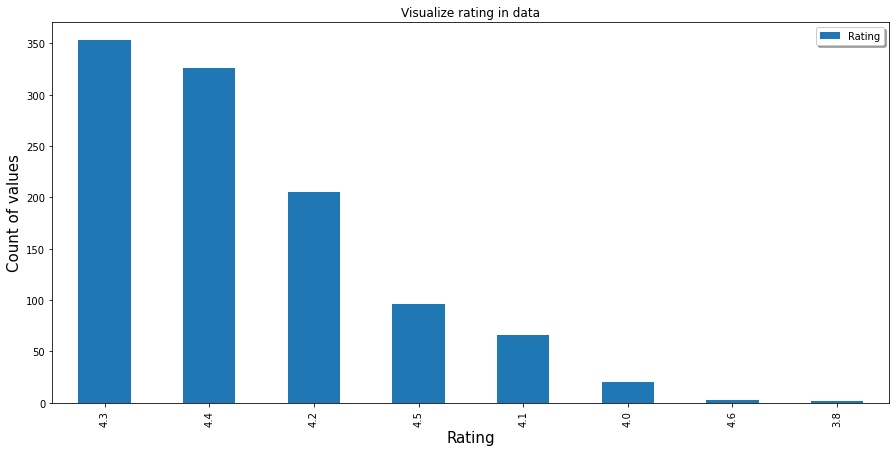

In [30]:
# Visualising Rating col using bar chart
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7)) 
df['Rating'].value_counts().plot(kind='bar',title='Visualize rating in data')
plt.xlabel('Rating',{'size':15})
plt.ylabel('Count of values',{'size':15})
plt.legend(frameon=True,shadow=True)
plt.show()

# Observations:

* From above chart we visualize Rating with its individual counts
* 4.3 rating has more number of observation

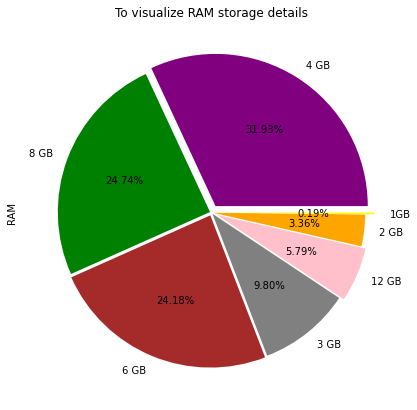

In [36]:
# Visualizing RAM column using pie chart
plt.figure(figsize=(15,7))
df['RAM'].value_counts().plot(kind='pie',explode=[0.05,0.01,0.02,0.01,0.04,0.01,0.07],labels=['4 GB','8 GB','6 GB','3 GB','12 GB','2 GB','1GB'],
                             colors=['purple','green','brown','gray','pink','orange','yellow'],
                             autopct='%1.2f%%',title='To visualize RAM storage details')
plt.show()

# Observations:

* From above chart we visulaize RAM 
* There is having more mobiles with 4GB storage and least with 1GB

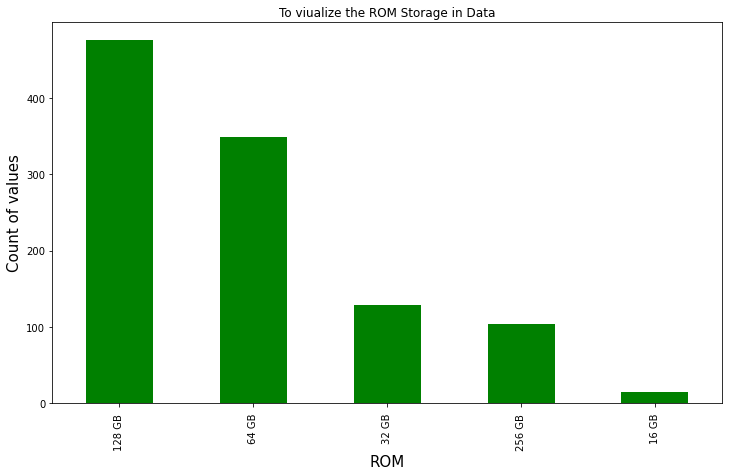

In [37]:
# Visualize ROM using bar plot
plt.figure(figsize=(12,7)) 
df['ROM'].value_counts().plot(kind='bar',color='g',title="To viualize the ROM Storage in Data")
plt.xlabel("ROM",{'size':15})
plt.ylabel("Count of values",{'size':15})
plt.show()

# Observations:

* From above chart we visualize ROM with its number of Observations
* Mobile having 128GB is more and least with 16GB

C:\Users\RIYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


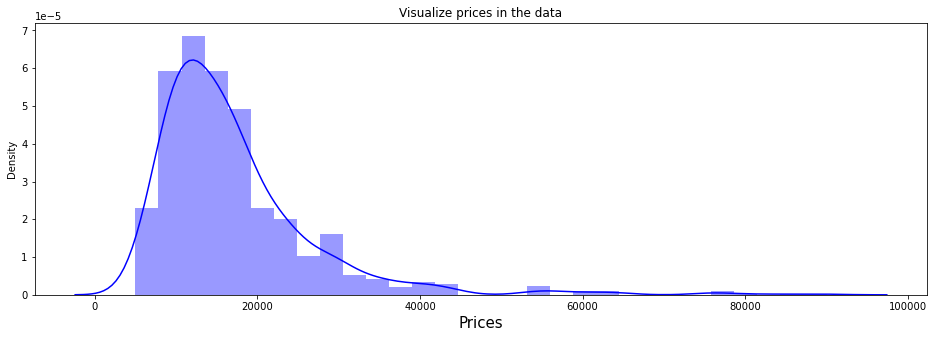

In [38]:
# checking distribution of Prices column using distplot
plt.figure(figsize=(16,5))
sns.distplot(df['Prices'],kde=True,bins=30,color='b')
plt.title("Visualize prices in the data")
plt.xlabel("Prices",{'size':15})
plt.show()

# Observation:

Distribution plot is slightly skewed on positive side

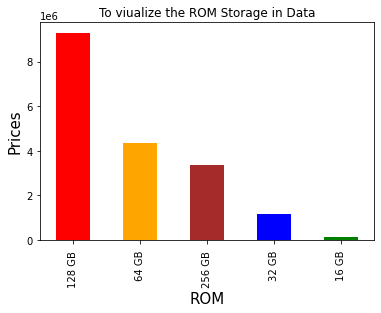

In [40]:
# visualize ROM and Prices using Bar plot
df.groupby(['ROM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',color=['red','orange','brown','blue','green'],title="To viualize the ROM Storage in Data")
plt.xlabel("ROM",{'size':15})
plt.ylabel("Prices",{'size':15})
plt.show()

# Observations:

* From above chart, visualize ROM with Prices
* Mobiles having 128 GB Rom are more and 16GB are less

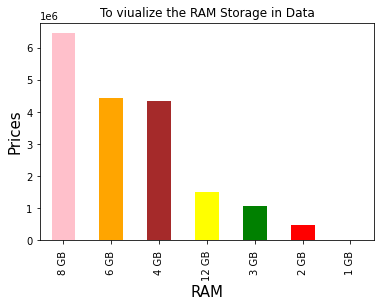

In [42]:
# Visualize RAM and Prices using Bar plot
df.groupby(['RAM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',color=['pink','orange','brown','yellow','green','red','blue'],title="To viualize the RAM Storage in Data")
plt.xlabel("RAM",{'size':15})
plt.ylabel("Prices",{'size':15})
plt.show()

# Observations:

* From above chart, visualize RAM with Prices
* Mobiles having 8 GB RAM are more and 1GB RAM are less

In [43]:
# Before giving dataset to ML algorithms removing unit(GB)
df['ROM']=df['ROM'].str.replace('GB','')
df['RAM']=df['RAM'].str.replace('GB','')

In [44]:
df

,Mobile_Model,Prices,Rating,RAM,ROM
0,"Google Pixel 6a (Charcoal, 128 GB)",28999,4.3,6,128
1,"Google Pixel 6a (Chalk, 128 GB)",28999,4.3,6,128
2,"Google Pixel 7a (Sea, 128 GB)",43999,4.0,8,128
3,"Google Pixel 7a (Charcoal, 128 GB)",43999,4.0,8,128
4,"Google Pixel 7a (Snow, 128 GB)",43999,4.0,8,128
...,...,...,...,...,...
163,"Infinix Hot S3 (Sandstone Black, 32 GB)",9999,4.2,3,32
164,"Infinix Note 10 (Emerald Green, 64 GB)",10999,4.2,4,64
165,"Infinix Hot 4 Pro (Magic Gold, 16 GB)",7499,4.0,3,16
166,"Infinix Note 10 (7° Purple, 64 GB)",10999,4.2,4,64


In [45]:
# import the utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [46]:
# Converting all categorical columns to numerical
label=LabelEncoder()
df['Mobile_Model']=label.fit_transform(df['Mobile_Model'])
df['RAM']=label.fit_transform(df['RAM'])
df['ROM']=label.fit_transform(df['ROM'])

In [47]:
# separate independent and dependent variable
x=df.drop(['Prices'],axis=1)
y=df['Prices']

# standardization not giving better result
#scaler=StandardScaler()
#x=scaler.fit_transform(x)

In [48]:
# import the data into train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=120)
x_train.shape,y_train.shape

((803, 4), (803,))

In [49]:
# Apply Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [50]:
lr.coef_

array([-1.83034658e-01,  1.48183221e+04,  2.95293028e+02, -1.87276946e+03])

In [51]:
lr.intercept_

-44285.23157827112

In [52]:
pred=lr.predict(x_test)    

In [53]:
y_test

55     17999
20     16999
37     14999
111     9499
224    31999
       ...  
15      8999
108    15487
15      6499
137    14490
141    12999
Name: Prices, Length: 268, dtype: int32

In [54]:
lr.score(x_test,y_test)

0.18683894206447427

In [55]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print("Mean square error",mse)
print("Root mean square error",rmse)

Mean square error 56260412.45104135
Root mean square error 7500.694131281541


In [ ]:
# Apply Ridge Algo

In [99]:
from sklearn.linear_model import Ridge

In [100]:
ridge = Ridge(alpha=1.0) 

# Fit the model to the training data
ridge.fit(x_train, y_train)

# Predict on the test set
y_pred = ridge.predict(x_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 56054076.61299538
R-squared: 0.18982122145144964


In [ ]:
# Apply DecisionTreeRegressor model

In [98]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Decision Tree model
dt = DecisionTreeRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root mean square error",rmse)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 7167151.9701492535
R-squared: 0.8964094178388239
Root mean square error 2677.1537068590687


In [ ]:
# Apply RandomForestRegressor model

In [96]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest model
rf = RandomForestRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root mean square error",rmse)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 8099714.168807149
R-squared: 0.882930610432084
Root mean square error 2845.9996782865505


In [ ]:
# Apply K-NearsetNeighborsRegressor model

In [94]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Create the KNN model
knn = KNeighborsRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root mean square error",rmse)

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Squared Error: 9970127.243962288
R-squared: 0.8558965556019111
Root mean square error 3157.5508299886937


In [ ]:
# Apply SupportVectorRegressor model

In [90]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

In [93]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

svr = SVR()

# Perform grid search cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root mean square error",rmse)

Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 57360297.438858256
R-squared: 0.17094173119566125
Root mean square error 7573.658127936476


# Observations:

* From above Regression Model, DecisionTreeRegressor having highest r2_score 
* Then RandomForestRegressor and K-NearsetNeighbour